In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Bank_customers_data (1).csv')

**there is no null values in the data set**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4014 non-null   int64  
 1   Customer ID         4014 non-null   int64  
 2   Name                4014 non-null   object 
 3   Surname             4014 non-null   object 
 4   Gender              4014 non-null   object 
 5   Age                 4014 non-null   int64  
 6   Region              4014 non-null   object 
 7   Job Classification  4014 non-null   object 
 8   Date Joined         4014 non-null   object 
 9   Balance             4014 non-null   float64
 10  loan                4014 non-null   float64
 11  score               4014 non-null   float64
 12  loan_eligibility    4014 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 407.8+ KB


In [ ]:
data.shape

(4014, 13)

In [ ]:
data.head()

,Unnamed: 0,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
1,1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
2,2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95


**There is no duplicate values in the given dataset**

In [ ]:
data.duplicated().value_counts()

False    4014
Name: count, dtype: int64

In [ ]:
data.isnull().sum()

Unnamed: 0            0
Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
loan                  0
score                 0
loan_eligibility      0
dtype: int64

**UN Named column is dropped due to continous values**

In [ ]:
data=data.drop(['Unnamed: 0','Customer ID'],axis=1)

In [ ]:
data.shape

(4014, 11)

In [ ]:
data.describe()

,Age,Balance,loan,score,loan_eligibility
count,4014.000000,4014.000000,4014.000000,4014.000000,4.014000e+03
mean,38.611111,39766.448274,5557.883159,501.068012,2.100837e+05
std,9.819121,29859.489192,2582.640099,113.666117,3.677718e+05
min,15.000000,11.520000,1000.000000,300.000000,0.000000e+00
25%,31.000000,16115.367500,3366.000000,404.000000,0.000000e+00
50%,37.000000,33567.330000,5566.500000,502.000000,3.040905e+04
75%,45.000000,57533.930000,7768.750000,596.750000,2.787510e+05
max,64.000000,183467.700000,9996.000000,700.000000,3.633620e+06


In [ ]:
data.describe(include='object')

,Name,Surname,Gender,Region,Job Classification,Date Joined
count,4014,4014,4014,4014,4014,4014
unique,172,150,2,4,3,307
top,Jason,Kerr,Male,England,White Collar,24.Sep.15
freq,42,41,2165,2159,1955,67


**Visualization:** we have to visualize the data because in visualization part we observe outliers

we observe how the features are impacting the output feature

we observe the correlation of features

In [ ]:
#import seaborn as sns
#sns.boxplot(data['Customer ID'])


<Axes: ylabel='Age'>

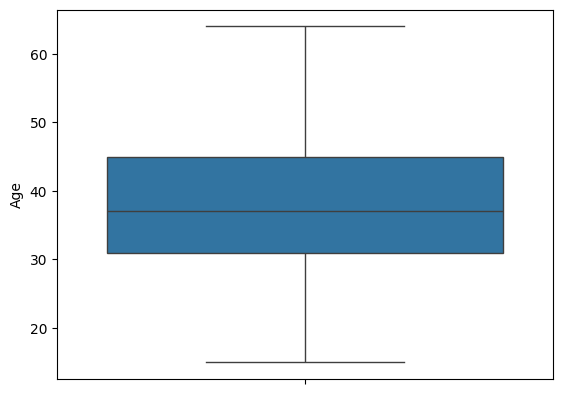

In [ ]:
import seaborn as sns
sns.boxplot(data['Age'])

<Axes: ylabel='Balance'>

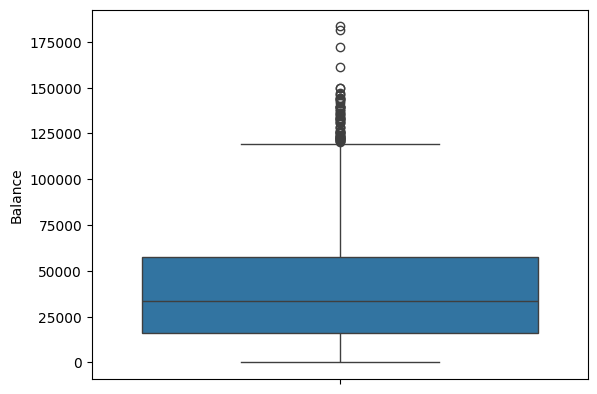

In [ ]:
import seaborn as sns
sns.boxplot(data['Balance'])
#data['Balance']=np.log10(data['Balance'])

<Axes: ylabel='Balance'>

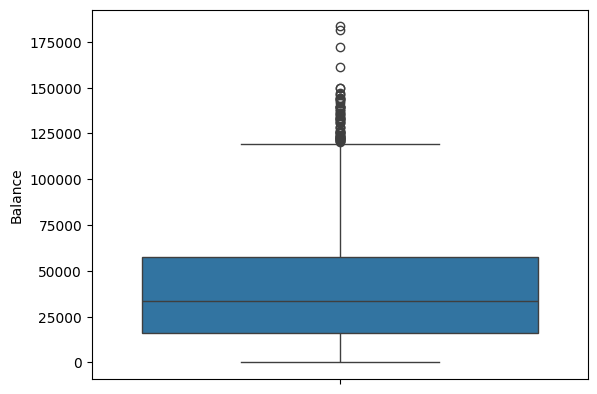

In [ ]:
sns.boxplot(data['Balance'])

<Axes: ylabel='loan'>

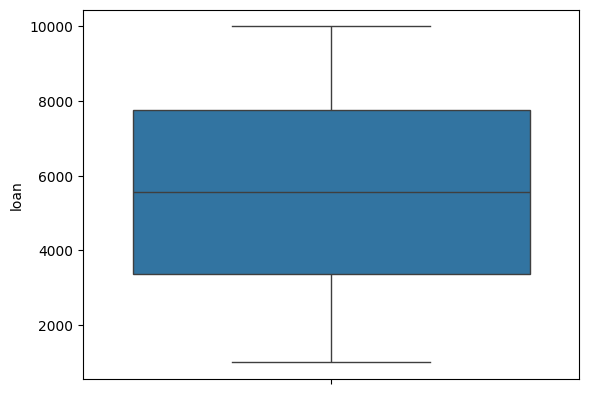

In [ ]:
import seaborn as sns
sns.boxplot(data['loan'])

<Axes: ylabel='score'>

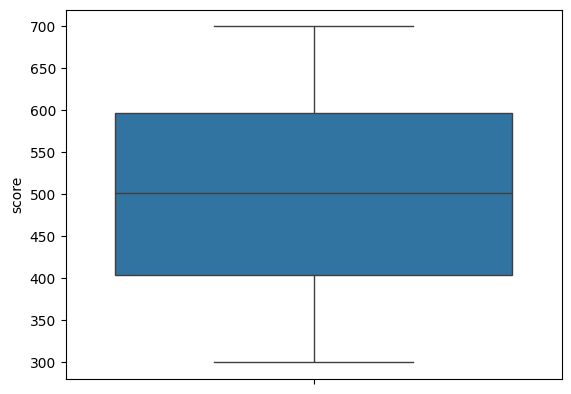

In [ ]:
import seaborn as sns
sns.boxplot(data['score'])

<Axes: ylabel='loan_eligibility'>

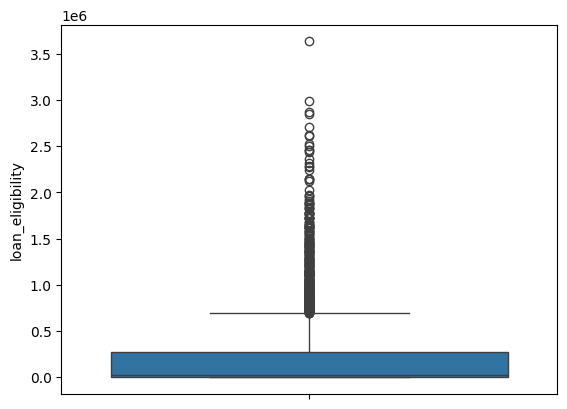

In [ ]:
import seaborn as sns
sns.boxplot(data['loan_eligibility'])
#data['loan_eligibility']=np.log10(data['loan_eligibility'])

**only 3 columns contains outliers**

In [ ]:
numerical_data = data.select_dtypes(include=['number'])
numerical_data.head()

,Age,Balance,loan,score,loan_eligibility
0,21,113810.15,5252.0,644.0,2276203.00
1,34,36919.73,8907.0,697.0,0.00
2,46,101536.83,2162.0,617.0,2030736.60
3,32,1421.52,7277.0,672.0,0.00
4,38,35639.79,2586.0,405.0,178198.95


In [ ]:
num = numerical_data.drop(['loan_eligibility'], axis=1)

In [ ]:
for k,v in num.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    v_col = v[(v >= lower_bound) & (v <= upper_bound)]

    # Dropping outliers from the original DataFrame
    data = data[data[k].isin(v_col)]

    # Calculate the percentage of outliers
    perc = (len(v) - len(v_col)) * 100 / len(num)
    print('Column {} outliers dropped: {:.2f}%'.format(k,perc))

Column Age outliers dropped: 0.00%
Column Balance outliers dropped: 1.67%
Column loan outliers dropped: 0.00%
Column score outliers dropped: 0.00%


In [ ]:
data.shape

(3947, 11)

**CORRELATION tells us the relation between features that how they are related and feature similaties is observed**

In [ ]:
data.corr(numeric_only=True)

,Age,Balance,loan,score,loan_eligibility
Age,1.000000,0.022528,0.001213,-0.013903,-0.222093
Balance,0.022528,1.000000,0.033125,-0.008583,0.410198
loan,0.001213,0.033125,1.000000,-0.027133,0.001699
score,-0.013903,-0.008583,-0.027133,1.000000,0.305247
loan_eligibility,-0.222093,0.410198,0.001699,0.305247,1.000000


In [ ]:
data.head()

,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,loan,score,loan_eligibility
0,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15,5252.0,644.0,2276203.00
1,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73,8907.0,697.0,0.00
2,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83,2162.0,617.0,2030736.60
3,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52,7277.0,672.0,0.00
4,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79,2586.0,405.0,178198.95


**split the date and time features as accordingly**

In [ ]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'])
data['Year'] = data['Date Joined'].dt.year
data['Month'] = data['Date Joined'].dt.month
data['Day'] = data['Date Joined'].dt.day


<ipython-input-324-896d3f44489a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date Joined'] = pd.to_datetime(data['Date Joined'])


In [ ]:
data.shape

(3947, 14)

**drop the date joined column**

In [ ]:
data=data.drop(['Date Joined'],axis=1)

In [ ]:
data.shape

(3947, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3947 entries, 0 to 4013
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                3947 non-null   object 
 1   Surname             3947 non-null   object 
 2   Gender              3947 non-null   object 
 3   Age                 3947 non-null   int64  
 4   Region              3947 non-null   object 
 5   Job Classification  3947 non-null   object 
 6   Balance             3947 non-null   float64
 7   loan                3947 non-null   float64
 8   score               3947 non-null   float64
 9   loan_eligibility    3947 non-null   float64
 10  Year                3947 non-null   int32  
 11  Month               3947 non-null   int32  
 12  Day                 3947 non-null   int32  
dtypes: float64(4), int32(3), int64(1), object(5)
memory usage: 514.5+ KB


In [ ]:
!pip install feature_engine -q

In [ ]:
data.describe(include='object')

,Name,Surname,Gender,Region,Job Classification
count,3947,3947,3947,3947,3947
unique,172,150,2,4,3
top,Jason,Kerr,Male,England,White Collar
freq,40,40,2123,2121,1915


**ENCODING**

In [ ]:
from feature_engine.encoding import MeanEncoder
a=['Name','Surname','Gender','Region','Job Classification']
encoder=MeanEncoder(variables=a)

In [ ]:
data=encoder.fit_transform(data,data['loan_eligibility'])

In [ ]:
data.head()

,Name,Surname,Gender,Age,Region,Job Classification,Balance,loan,score,loan_eligibility,Year,Month,Day
0,272651.219643,294809.189286,182555.038059,21,371546.1033,283356.359426,113810.15,5252.0,644.0,2276203.00,2015,1,5
1,197912.705000,129050.700000,219564.111458,34,0.0000,116185.783981,36919.73,8907.0,697.0,0.00,2015,1,6
2,300361.866071,280922.159259,182555.038059,46,371546.1033,283356.359426,101536.83,2162.0,617.0,2030736.60,2015,1,7
3,187778.639286,231845.930357,182555.038059,32,0.0000,283356.359426,1421.52,7277.0,672.0,0.00,2015,1,8
4,282752.154687,141347.737500,219564.111458,38,371546.1033,116185.783981,35639.79,2586.0,405.0,178198.95,2015,1,9


In [ ]:
data.columns

Index(['Name', 'Surname', 'Gender', 'Age', 'Region', 'Job Classification',
       'Balance', 'loan', 'score', 'loan_eligibility', 'Year', 'Month', 'Day'],
      dtype='object')

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
b=StandardScaler()

In [ ]:
data=b.fit_transform(data)

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.023278,1.478084,-0.926910,-1.796114,0.927855,1.029226,2.765774,-0.115083,1.262133,6.154744,0.0,-2.746414,-1.356479
1,-0.024464,-1.096812,1.078854,-0.472883,-1.077755,-1.026440,-0.045215,1.299131,1.729346,-0.591773,0.0,-2.746414,-1.240566
2,1.411747,1.262363,-0.926910,0.748561,0.927855,1.029226,2.317082,-1.310684,1.024118,5.427197,0.0,-2.746414,-1.124653
3,-0.166531,0.500011,-0.926910,-0.676457,-1.077755,1.029226,-1.342972,0.668442,1.508963,-0.591773,0.0,-2.746414,-1.008740
4,1.164881,-0.905790,1.078854,-0.065735,0.927855,-1.026440,-0.092008,-1.146628,-0.844738,-0.063603,0.0,-2.746414,-0.892827


In [ ]:
data.columns=['Name', 'Surname', 'Gender', 'Age', 'Region',
       'Job Classification', 'Balance', 'loan', 'score', 'loan_eligibility',
       'Year', 'Month', 'Day']

In [ ]:
data.head()

,Name,Surname,Gender,Age,Region,Job Classification,Balance,loan,score,loan_eligibility,Year,Month,Day
0,1.023278,1.478084,-0.926910,-1.796114,0.927855,1.029226,2.765774,-0.115083,1.262133,6.154744,0.0,-2.746414,-1.356479
1,-0.024464,-1.096812,1.078854,-0.472883,-1.077755,-1.026440,-0.045215,1.299131,1.729346,-0.591773,0.0,-2.746414,-1.240566
2,1.411747,1.262363,-0.926910,0.748561,0.927855,1.029226,2.317082,-1.310684,1.024118,5.427197,0.0,-2.746414,-1.124653
3,-0.166531,0.500011,-0.926910,-0.676457,-1.077755,1.029226,-1.342972,0.668442,1.508963,-0.591773,0.0,-2.746414,-1.008740
4,1.164881,-0.905790,1.078854,-0.065735,0.927855,-1.026440,-0.092008,-1.146628,-0.844738,-0.063603,0.0,-2.746414,-0.892827


**Algorithms**

Linear regression

In [ ]:
x=data.drop('loan_eligibility',axis=1)
y=data['loan_eligibility']

In [ ]:
x.shape

(3947, 12)

In [ ]:
y.shape

(3947,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

**training for linear regression**

In [ ]:
y_train_pred = lin_reg.predict(x_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_score(y_train, y_train_pred)

0.5975028963719007

In [ ]:
mean_absolute_error(y_train,y_train_pred)

0.4397827313116841

In [ ]:
mean_squared_error(y_train, y_train_pred)

0.39367935363477496

**linear regression  accuracy for training data is 60**

**testing for linear regression**

In [ ]:
y_pred = lin_reg.predict(x_test)

In [ ]:
mean_squared_error(y_pred, y_test)

0.44430294098784373

In [ ]:
mean_absolute_error(y_test,y_pred)

0.46083115432179417

In [ ]:
r2_score(y_test, y_pred)

0.5772790730841237

**linear regression accuracy for testing data is 0.56**

decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=13)
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=5)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_split=5, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from numpy import sqrt
y_pred=tree_reg.predict(x_test)
y_train_pred=tree_reg.predict(x_train)

**training**

In [ ]:
mse=mean_squared_error(y_train,y_train_pred)





mse

0.004102824823552659

In [ ]:
mean_absolute_error(y_train,y_train_pred)

0.037205018867621904

In [ ]:
sqrt(mse)

0.06405329674226502

In [ ]:
y_train_pred=tree_reg.predict(x_train)

In [ ]:
r2_score(y_train,y_train_pred)

0.9958499445502612

**decision tree accuracy for training data is 0.99**

**testing**

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

0.005257141786214945

In [ ]:
mean_absolute_error(y_test,y_pred)

0.04158245357834498

In [ ]:
sqrt(mse)

0.07250614998891435

In [ ]:
y_pred=tree_reg.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.9948769055235596

**my testing score is not good so i have done cross validation**

**cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
mse_scores = cross_val_score(tree_reg, x, y, cv=5, scoring='r2')

NameError: name 'tree_reg' is not defined

In [ ]:
print("R2 Scores:", mse_scores)

R2 Scores: [0.99538754 0.99449764 0.99502206 0.99353506 0.99245669]


In [ ]:
print('Average cross-validation score: {:.4f}'.format(mse_scores.mean()))

Average cross-validation score: 0.9942


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso = Lasso()
grid_search = GridSearchCV(estimator=lasso, param_grid=parameters, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best R2 score found: ", grid_search.best_score_)

Best parameters found:  {'alpha': 0.01}
Best R2 score found:  0.5835589670890433


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2]}
ridge = Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid=parameters, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best R2 score found: ", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.907e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.93632e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.92412e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.92489e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning:

Best parameters found:  {'alpha': 0.01}
Best R2 score found:  0.5824931003504922


**decision tree accuracy for training data is 0.58**

random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=100,random_state=42)
rf_reg.fit(x_train,y_train)
y_pred=rf_reg.predict(x_train)

In [ ]:
y_pred=rf_reg.predict(x_train)

**training**

In [ ]:
mse=mean_squared_error(y_train,y_pred)
mse

0.0002086731920661509

In [ ]:
mean_absolute_error(y_train,y_pred)

0.002062419833244612

In [ ]:
sqrt(mse)

0.014445524984096316

In [ ]:
r2_score(y_train,y_pred)

0.9997889246177469

**random forest accuracy for training is 84**

In [ ]:
y_pred_rf=rf_reg.predict(x_test)

**testing**

In [ ]:
mse=mean_squared_error(y_test,y_pred_rf)
mse

0.0006165901109129711

In [ ]:
mean_absolute_error(y_test,y_pred_rf)

0.0054162927232571465

In [ ]:
sqrt(mse)

0.024831232569346433

In [ ]:
r2_score(y_test,y_pred_rf)

0.9993991317868335

**my testing score is not good so i have done cross validation**

**cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
mse_scores = cross_val_score(lin_reg, x, y, cv=5, scoring='r2')

In [ ]:
print("R2 Scores:", mse_scores)

R2 Scores: [0.55208437 0.61094603 0.5786664  0.57035072 0.59423786]


In [ ]:
print('Average cross-validation score: {:.4f}'.format(mse_scores.mean()))

Average cross-validation score: 0.5813


**SVR**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=13)
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf',degree = 3, C=1.0, epsilon=0.1)
y_train = np.ravel(y_train)
svr_model.fit(x_train,y_train)

SVR()

**training**

In [ ]:
y_pred = svr_model.predict(x_train)

In [ ]:
mse=mean_squared_error(y_train,y_pred)
mse

0.05970705602432769

In [ ]:
mean_absolute_error(y_train,y_pred)

0.11636301142444319

In [ ]:
r2_score(y_train,y_pred)

0.9396056122554456

**svr accuracy for training data is 0.94**

In [ ]:
y_pred_test=svr_model.predict(x_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred_test)
mse

0.09966593107157101

In [ ]:
mean_absolute_error(y_test,y_pred_test)

0.15018159289358782

In [ ]:
r2_score(y_test,y_pred_test)

0.9028753642709568

**svr testing accuracy is not good so i have done cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
mse_scores = cross_val_score(lin_reg, x, y, cv=5, scoring='r2')

In [ ]:
print("R2 Scores:", mse_scores)

R2 Scores: [0.55208437 0.61094603 0.5786664  0.57035072 0.59423786]


In [ ]:
print('Average cross-validation score: {:.4f}'.format(mse_scores.mean()))

Average cross-validation score: 0.5813


**svr testing accuracy is 58**